In [1]:
import pandas as pd
from pathlib import Path

# ------------------------------------------------------------------
# 1) Where are your CSV files?
#    "."  → current working directory of the notebook kernel
# ------------------------------------------------------------------
folder = Path("./results_tmp")          # change if needed

# ------------------------------------------------------------------
# 2) Find and read all *.csv (non-recursive)
# ------------------------------------------------------------------
csv_files = sorted(folder.glob("*.csv"))
if not csv_files:
    raise FileNotFoundError(f"No .csv files found in {folder.resolve()}")

frames = []
for f in csv_files:
    try:
        df = pd.read_csv(f)
        df["source_file"] = f.name          # keep origin column (optional)
        frames.append(df)
    except Exception as e:
        print(f"⚠️  Skipped {f.name}: {e}")

# ------------------------------------------------------------------
# 3) Concatenate into one DataFrame
# ------------------------------------------------------------------
combined = pd.concat(frames, ignore_index=True)
print(f"{len(csv_files)} files   →   {len(combined)} total rows")

# Show a quick peek
combined.head()


37834 files   →   37834 total rows


,task,target_task,batch_size,dropout,epochs,lr,weight_decay,repr_model,num_layers,encoding_dim,...,num_cv_bins,scaffold_split_val_sz,use_erg,use_ft,ft_resolution,rg_embedding_dim,mean_val_loss,std_val_loss,mae_test_scaffold,source_file
0,molecule_net,ESOL,64,0.1,100,0.001,0.0001,EHIMP_a,3,8,...,10,0.1,True,True,3,16,0.812125,0.081222,1.226729,run_dgx-h100-em2_1000447_78e6a7ab_20250701_172...
1,molecule_net,ESOL,64,0.1,100,0.001,0.0001,EHIMP_b,3,8,...,10,0.1,True,True,3,16,0.677611,0.046089,0.925555,run_dgx-h100-em2_1002276_a86145f5_20250701_172...
2,molecule_net,ESOL,64,0.1,100,0.001,0.0001,EHIMP_c,3,8,...,10,0.1,True,True,3,16,0.698568,0.105615,0.805219,run_dgx-h100-em2_1002602_1d24ee38_20250701_172...
3,admet,MDR1-MDCKII,128,0.1,50,0.001,0.0001,EHIMP_c,1,8,...,10,0.1,True,True,2,16,0.418750,0.056730,0.353672,run_dgx-h100-em2_10031_9f3b28dd_20250701_14112...
4,molecule_net,ESOL,64,0.1,100,0.001,0.0001,EHIMP_a,3,8,...,10,0.1,True,True,3,16,0.852629,0.074746,0.969635,run_dgx-h100-em2_1003274_de579b9b_20250701_172...


In [2]:
subset = combined #combined[combined["repr_model"] == 'EHIMP_c']

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace(r"^EHIMP_[abc]$", "EHIMP", regex=True)
#)

best_rows = subset.loc[
    subset.groupby("target_task")["mean_val_loss"].idxmin()
].sort_values("target_task")#.round(2)

best_rows


,task,target_task,batch_size,dropout,epochs,lr,weight_decay,repr_model,num_layers,encoding_dim,...,num_cv_bins,scaffold_split_val_sz,use_erg,use_ft,ft_resolution,rg_embedding_dim,mean_val_loss,std_val_loss,mae_test_scaffold,source_file
3554,molecule_net,ESOL,64,0.1,150,0.001,0.0001,GraphSAGE,3,8,...,10,0.1,False,False,1,8,0.476848,0.038952,0.709665,run_dgx-h100-em2_1538166_90d09982_20250626_145...
29428,molecule_net,FreeSolv,64,0.1,150,0.001,0.0001,GraphSAGE,3,8,...,10,0.1,False,False,1,8,0.613095,0.077872,1.694941,run_galadriel_2933796_fe1f0878_20250627_052945...
10779,admet,HLM,128,0.1,100,0.001,0.0001,EHIMP_a,2,8,...,10,0.1,True,True,2,32,0.345002,0.025311,0.543236,run_dgx-h100-em2_3714336_59575ddc_20250630_194...
12350,admet,KSOL,64,0.1,100,0.001,0.0001,HIMP,3,8,...,10,0.1,False,False,1,8,0.291791,0.047542,0.341227,run_dgx-h100-em2_47190_63af738e_20250626_12291...
30903,molecule_net,Lipo,64,0.1,150,0.001,0.0001,EHIMP_b,3,8,...,10,0.1,True,True,1,32,0.465480,0.005340,0.494063,run_galadriel_329057_62786953_20250703_081735.csv
8726,admet,LogD,64,0.1,150,0.001,0.0001,EHIMP_b,3,8,...,10,0.1,True,True,1,32,0.436921,0.037625,0.725513,run_dgx-h100-em2_2881675_93601145_20250630_222...
32905,admet,MDR1-MDCKII,64,0.1,150,0.001,0.0001,EHIMP,3,8,...,10,0.1,True,True,1,32,0.291605,0.033723,0.375583,run_galadriel_3697972_8fc0e629_20250626_001424...
382,admet,MLM,64,0.1,150,0.001,0.0001,EHIMP_b,3,8,...,10,0.1,True,True,1,32,0.389584,0.061553,0.534601,run_dgx-h100-em2_1104747_fc98ff71_20250630_171...
5474,potency,pIC50 (MERS-CoV Mpro),64,0.1,150,0.001,0.0001,HIMP,2,8,...,10,0.1,False,False,1,8,0.454855,0.039013,0.598385,run_dgx-h100-em2_1974079_755855d5_20250626_131...
7261,potency,pIC50 (SARS-CoV-2 Mpro),128,0.1,150,0.001,0.0001,EHIMP_a,3,8,...,10,0.1,True,True,1,16,0.464430,0.060269,0.453154,run_dgx-h100-em2_2613134_ece448cc_20250627_235...


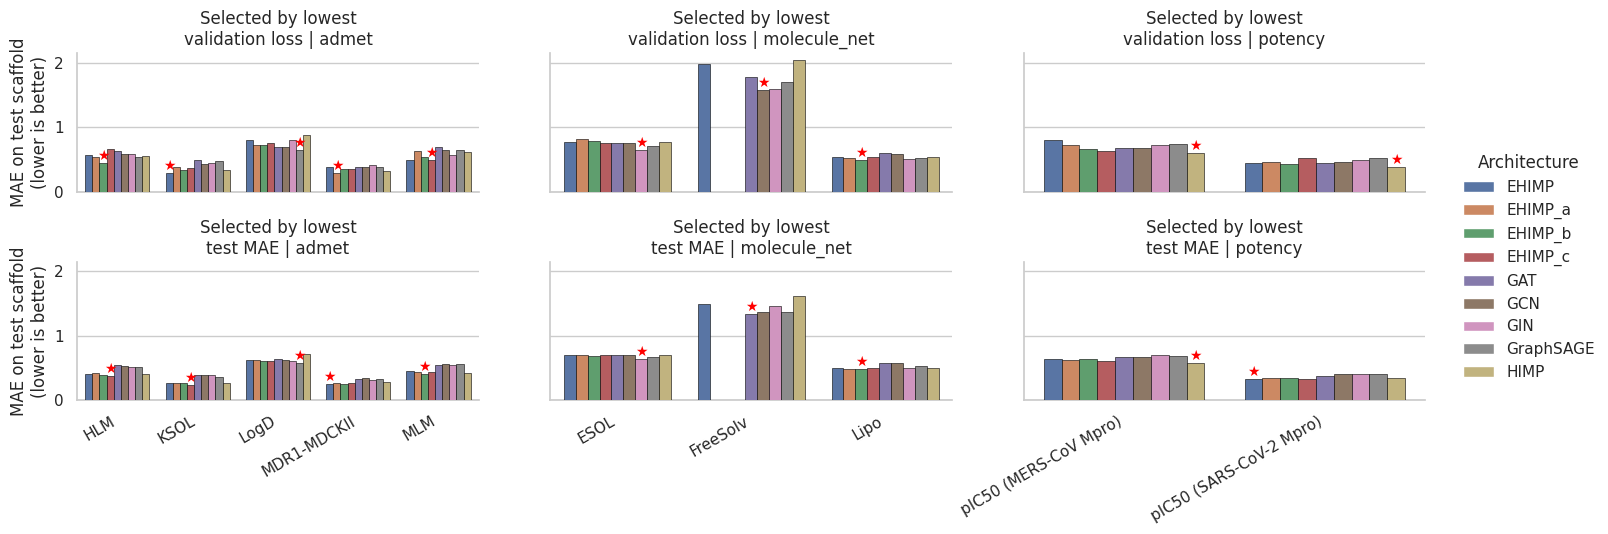

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ARCH_COL = "repr_model"

# ── 1. tables for the two selection criteria ─────────────────────────────
by_val = (
    combined.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"]
            .idxmin().round()
)
best_val = combined.loc[by_val].copy()
best_val["criterion"] = "Selected by lowest\nvalidation loss"

by_mae = (
    combined.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"]
            .idxmin()
)
best_mae = combined.loc[by_mae].copy()
best_mae["criterion"] = "Selected by lowest\ntest MAE"

plot_data = pd.concat([best_val, best_mae], ignore_index=True)

# consistent palette for architectures
archs   = sorted(plot_data[ARCH_COL].unique())
palette = dict(zip(archs, sns.color_palette(n_colors=len(archs))))

# ── 2. facet grid: row = criterion (2 rows), col = task ──────────────────
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    plot_data,
    row="criterion",
    col="task",
    sharex=False,           # so each panel gets only its targets
    height=2.75,
    aspect=1.8,
)

def bars(data, **kwargs):
    order = data["target_task"].unique()
    sns.barplot(
        data=data,
        x="target_task",
        y="mae_test_scaffold",
        hue=ARCH_COL,
        order=order,
        palette=palette,
        dodge=True,
        **kwargs,
    )

g.map_dataframe(bars)

g.set_axis_labels("", "MAE on test scaffold\n(lower is better)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title="Architecture")

# ── 3. add ★ over lowest bar(s) per (task,target_task) ───────────────────
star_kw = dict(s="★", color="red", fontsize=10,
               ha="center", va="bottom", zorder=6)

for ax in g.axes.flat:
    if not ax.patches:
        continue

    # match each bar to its category tick via nearest tick position
    tick_pos = np.asarray(ax.get_xticks())
    tick_lab = [t.get_text() for t in ax.get_xticklabels()]
    groups   = {lab: [] for lab in tick_lab}

    for p in ax.patches:
        if p.get_height() == 0:           # skip phantom bars
            continue
        cx   = p.get_x() + p.get_width()/2
        idx  = int(np.argmin(np.abs(tick_pos - cx)))
        groups[tick_lab[idx]].append(p)

    for bars in groups.values():
        if not bars:
            continue
        min_h = min(b.get_height() for b in bars)
        for b in bars:
            if np.isclose(b.get_height(), min_h):
                ax.text(b.get_x() + b.get_width()/2, b.get_height(), **star_kw)

# rotate x-tick labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=25, ha="right")

# ----------------------------------------------
# 4. show x-labels only on the second row
# ----------------------------------------------
n_cols = len(g.col_names)            # how many panels per row
for i, ax in enumerate(g.axes.flat):
    row_idx = i // n_cols            # 0 = first row, 1 = second row
    if row_idx == 0:
        ax.set_xlabel("")            # remove x-axis label
        ax.set_xticklabels([])       # hide tick labels
    else:
        # keep & rotate labels for the second row
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# ────────────────── 5. give every bar a black outline ────────────────────
for ax in g.axes.flat:
    for p in ax.patches:
        p.set_edgecolor("black")   # outline colour
        p.set_linewidth(0.4)       # outline thickness
        p.set_zorder(3)            # ensure outline sits above grid lines

        
# leave room at right for legend
plt.tight_layout(rect=[0, 0, 0.90, 1])
plt.show()


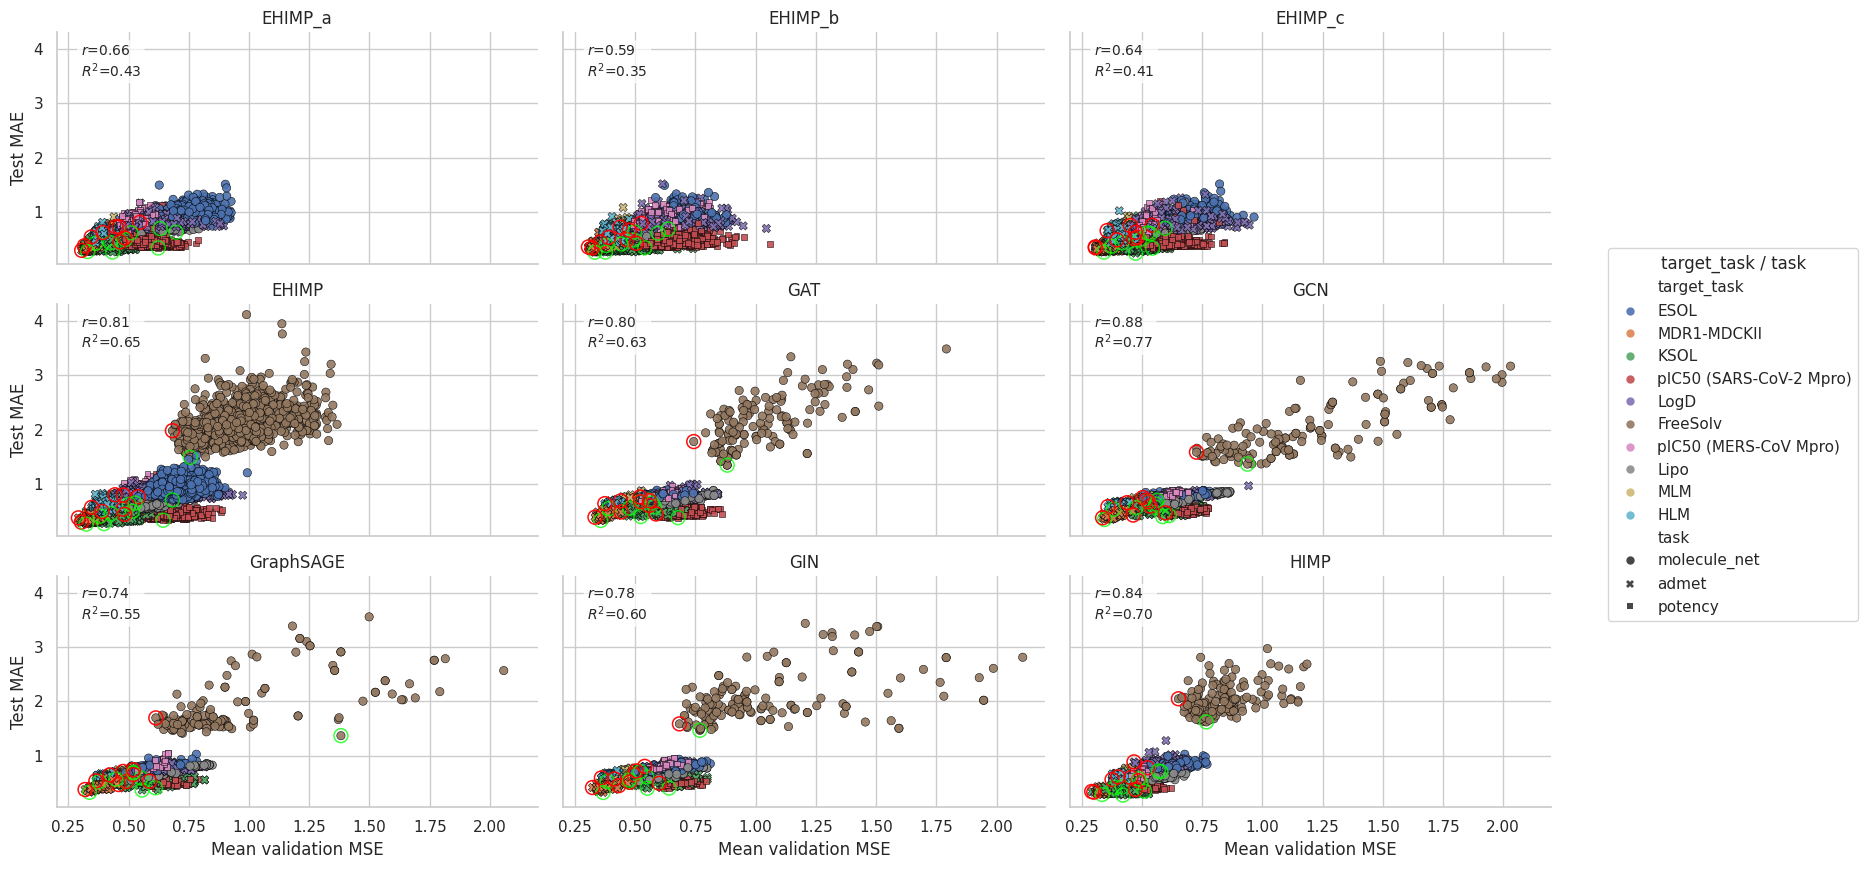


Correlation per architecture (all target_tasks pooled):
architecture  Pearson_r    R2    n
         GCN      0.878 0.771 1440
        HIMP      0.838 0.703 1440
       EHIMP      0.808 0.652 8669
         GAT      0.796 0.633 1441
         GIN      0.776 0.603 1440
   GraphSAGE      0.741 0.549 1440
     EHIMP_a      0.658 0.433 7316
     EHIMP_c      0.642 0.412 7321
     EHIMP_b      0.593 0.351 7327

Correlation per (target_task, architecture):
            target_task architecture  Pearson_r    R2   n
                   ESOL          GIN      0.675 0.455 144
                   ESOL    GraphSAGE      0.634 0.403 144
                   ESOL          GCN      0.540 0.291 144
                   ESOL         HIMP      0.409 0.167 144
                   ESOL      EHIMP_a      0.405 0.164 859
                   ESOL          GAT      0.351 0.123 144
                   ESOL        EHIMP      0.324 0.105 864
                   ESOL      EHIMP_b      0.315 0.099 857
                   ESOL  

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_theme(style="whitegrid")

# ────────────────── scatter grid  ──────────────────────────────
g = sns.relplot(
    data=combined,
    x="mean_val_loss",
    y="mae_test_scaffold",
    hue="target_task",
    style="task",
    col="repr_model",
    kind="scatter",
    col_wrap=3,
    height=2.95,
    aspect=1.5,
    alpha=0.9,
)

g.set_axis_labels("Mean validation MSE", #loss
                  "Test MAE")
g.set_titles("{col_name}")

# consolidated legend
g._legend.remove()
handles, labels = g.axes[0].get_legend_handles_labels()
g.fig.legend(handles, labels, title="target_task / task",
             bbox_to_anchor=(1.02, 0.5), loc="center left")

# ----------------------------------------------------------------
# Find which marker Seaborn assigned to each task
# ----------------------------------------------------------------
# the legend handles contain that mapping
marker_lookup = {}   # task → matplotlib MarkerStyle
for handle, label in zip(handles, labels):
    if label in combined["task"].unique():
        marker_lookup[label] = handle.get_marker()

# fall back if some task didn't appear in legend
default_markers = ["o", "s", "D", "^", "v", "P", "X"]
for task, m in zip(sorted(combined["task"].unique()), default_markers):
    marker_lookup.setdefault(task, m)

# colour palette lookup (same hues Seaborn used)
hue_palette = dict(zip(
    combined["target_task"].unique(),
    sns.color_palette()[: combined["target_task"].nunique()]
))

rows = [] 
# ----------------------------------------------------------------
# loop through panels, annotate emphasis points
# ----------------------------------------------------------------
for ax in g.axes.flat:
    arch = ax.get_title()
    subset_arch = combined[combined["repr_model"] == arch]

    # add correlation annotation as before
    if len(subset_arch) >= 2:
        x = subset_arch["mean_val_loss"].values.reshape(-1, 1)
        y = subset_arch["mae_test_scaffold"].values
        r, _ = stats.pearsonr(x.ravel(), y)
        r2 = r2_score(y, LinearRegression().fit(x, y).predict(x))

        rows.append(
            {"architecture": arch, "Pearson_r": r, "R2": r2, "n": len(subset_arch)}
        )
        
        ax.text(0.05, 0.95, f"$r$={r:.2f}\n$R^2$={r2:.2f}",
                transform=ax.transAxes, ha="left", va="top",
                fontsize=10, bbox=dict(boxstyle="round,pad=0.2",
                fc="white", alpha=0.7))

    # highlight points per target_task
    for tgt, grp in subset_arch.groupby("target_task"):
        # lowest test MAE
        mae_row = grp.loc[grp["mae_test_scaffold"].idxmin()]
        ax.scatter(mae_row["mean_val_loss"], mae_row["mae_test_scaffold"],
                   marker="o",#marker_lookup[mae_row["task"]],
                   s=100, facecolors='none',
                   #color=hue_palette[tgt], 
                   edgecolors="lime", alpha=0.75,
                   linewidth=1.1, zorder=5, label='Min Mean test MAE')

        # lowest validation loss
        val_row = grp.loc[grp["mean_val_loss"].idxmin()]
        ax.scatter(val_row["mean_val_loss"], val_row["mae_test_scaffold"],
                   marker="o",#marker_lookup[val_row["task"]],
                   s=100, facecolors='none', edgecolors="red", alpha=0.95,#hue_palette[tgt],
                   linewidth=1.1, zorder=5, label='Min Mean val. MSE')

# ▶ 5. add thin black edge around every normal point (skip hollow highlights)
for ax in g.axes.flat:
    for col in ax.collections:
        # Hollow highlight circles have no facecolour (alpha=0)
        fc = col.get_facecolors()
        if fc.size == 0 or np.all(fc[:, -1] == 0):   # alpha==0 → skip
            continue
        col.set_edgecolor("black")
        col.set_linewidth(0.4)
        col.set_zorder(3)          # draw outline above gridlines


plt.tight_layout()
plt.show()



# ────────────────── summary table  ─────────────────────────────
summary = pd.DataFrame(rows).sort_values("Pearson_r", ascending=False)
print("\nCorrelation per architecture (all target_tasks pooled):")
print(summary.to_string(index=False, float_format="%.3f"))

# ────────────────── summary table per target_task  ─────────────
rows_tgt = []

for (arch, tgt), grp in combined.groupby(["repr_model", "target_task"]):
    if len(grp) < 2:
        continue                                 # need ≥2 points
    x = grp["mean_val_loss"].values
    y = grp["mae_test_scaffold"].values

    r,  _ = stats.pearsonr(x, y)
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    r2 = r2_score(y, model.predict(x.reshape(-1, 1)))

    rows_tgt.append(
        {"target_task": tgt, "architecture": arch, "Pearson_r": r, "R2": r2, "n": len(grp)}
    )

summary_tgt = (
    pd.DataFrame(rows_tgt)
      .sort_values(["target_task", "Pearson_r"], ascending=[True, False])
)

print("\nCorrelation per (target_task, architecture):")
print(summary_tgt.to_string(index=False, float_format="%.3f"))



In [5]:
import pandas as pd
import numpy as np

k_values = [5] #1,3,10
ARCH_COL  = "repr_model"
metrics   = ["avg_val_loss", "avg_test_mae", "best_test_mae"]
decimals  = 2                              # ← number of digits to keep
fmt       = f"{{:.{decimals}f}}"          # e.g. "{:.2f}"

for k in k_values:
    # ── build summary table ───────────────────────────────────────────────
    rows = []
    for (task, tgt, arch), grp in combined.groupby(
            ["task", "target_task", ARCH_COL]):
        topk = grp.nsmallest(k, "mean_val_loss")
        if topk.empty:
            continue
        rows.append({
            "task":           task,
            "target_task":    tgt,
            "architecture":   arch,
            "k_used":         len(topk),
            "avg_val_loss":   topk["mean_val_loss"].mean(),
            "avg_test_mae":   topk["mae_test_scaffold"].mean(),
            "best_test_mae":  topk["mae_test_scaffold"].min(),
        })

    print(f"\n=== Averages over top-{k} runs per (task, target, arch) ===")
    if not rows:
        print("(no matching rows)")
        continue

    df = (pd.DataFrame(rows)
            .sort_values(["target_task", "task", "architecture"])
            .reset_index(drop=True))

    # ── create a printable copy & mark best (ties after rounding) ─────────
    df_fmt = df.copy()

    for tgt, sub in df.groupby("target_task"):
        for col in metrics:
            # round to requested precision, then find the minimum
            rounded = sub[col].round(decimals)
            best_val = rounded.min()
            # rows within this target that match the rounded min get a star
            mask = (df["target_task"] == tgt) & (df[col].round(decimals) == best_val)
            df_fmt.loc[mask, col] = df.loc[mask, col].apply(lambda v: fmt.format(v) + "*")

    # format all other numeric cells (two decimals, no star)
    for col in metrics:
        df_fmt[col] = df_fmt[col].apply(
            lambda x: fmt.format(x) if isinstance(x, (int, float, np.floating)) else x
        )

    print(df_fmt.to_string(index=False))



=== Averages over top-5 runs per (task, target, arch) ===
        task             target_task architecture  k_used avg_val_loss avg_test_mae best_test_mae
molecule_net                    ESOL        EHIMP       5         0.55         0.84          0.76
molecule_net                    ESOL      EHIMP_a       5         0.56         0.83          0.81
molecule_net                    ESOL      EHIMP_b       5         0.53         0.83          0.79
molecule_net                    ESOL      EHIMP_c       5         0.55         0.85          0.76
molecule_net                    ESOL          GAT       5         0.53         0.77          0.73
molecule_net                    ESOL          GCN       5         0.52         0.76          0.70
molecule_net                    ESOL          GIN       5         0.51         0.71         0.65*
molecule_net                    ESOL    GraphSAGE       5        0.49*        0.70*          0.69
molecule_net                    ESOL         HIMP       5  

/tmp/ipykernel_567055/24083300.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.49*']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fmt.loc[mask, col] = df.loc[mask, col].apply(lambda v: fmt.format(v) + "*")
/tmp/ipykernel_567055/24083300.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.70*']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fmt.loc[mask, col] = df.loc[mask, col].apply(lambda v: fmt.format(v) + "*")
/tmp/ipykernel_567055/24083300.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.65*']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fmt.loc[mask, col] = df.loc[mask